In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding= 'ISO-8859-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2543,ham,Package all your programs well,NaN,NaN,NaN
3123,ham,My uncles in Atlanta. Wish you guys a great se...,NaN,NaN,NaN
3779,ham,Then ur physics get a-?,NaN,NaN,NaN
1525,ham,Pls pls find out from aunt nike.,NaN,NaN,NaN
1290,ham,Eat jap done oso aft ur lect wat... ?? got lec...,NaN,NaN,NaN


In [3]:
# Steps of sms-spam-detectiion project
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [6]:
df.sample(5)

,v1,v2
2806,spam,December only! Had your mobile 11mths+? You ar...
284,ham,Yeah I think my usual guy's still passed out f...
3616,ham,Sorry sent blank msg again. Yup but trying 2 d...
343,ham,Am not interested to do like that.
3880,ham,Can you plz tell me the ans. BSLVYL sent via f...


In [7]:
# renaming the columns
df.rename(columns = {'v1': 'target', 'v2': 'text' }, inplace = True)
df.sample(5)

,target,text
737,spam,Hi. Customer Loyalty Offer:The NEW Nokia6650 M...
5333,ham,Neither [in sterm voice] - i'm studying. All f...
4043,ham,"Yes, my reg is Ciao!"
1242,ham,Nobody can decide where to eat and dad wants C...
16,ham,Oh k...i'm watching here:)


In [8]:
# assigning 0 to ham and 1 to spam in target column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
# checking for missing and duplicate values
df.isnull().sum()
df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

## EDA

In [12]:
# check number of hams and spams in dataset
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

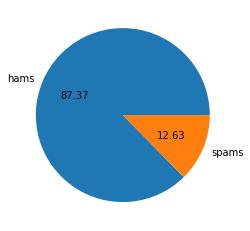

In [13]:
# visually seeing the above information, autopct="%0.2f" specifying that we want to see two values after decimal
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['hams', 'spams'], autopct="%0.2f")
plt.show()

In [14]:
# so the data is imbalanced as 80% of the values are hams and only 12% are spams

In [15]:
# creating new 3 columns to see number of characters, words and sentences in the sms column
import nltk

In [16]:
# to download some of the libraries that nltk needs
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PAK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['num_characters'] = df['text'].apply(len)

In [18]:
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
# fetch number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))  # converting each string of text into list of words and then counting them

In [20]:
df.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
# fetch number of sentences, sent_tokenize break the text on the basis of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))  # converting each string of text into list of words and then counting them

In [22]:
df.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.00000
mean,78.894177,18.592571,2.00503
std,58.162207,13.395103,1.47554
min,2.000000,1.000000,1.00000
25%,36.000000,9.000000,1.00000
50%,60.000000,15.000000,2.00000
75%,116.000000,26.000000,3.00000
max,910.000000,220.000000,38.00000


In [24]:
# using describe seperately for ham and spam
# for ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.424048,17.211470,1.863375
std,56.337668,13.525179,1.417710
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# for spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.471669,28.143951,2.984686
std,30.019848,7.132668,1.496339
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,223.000000,47.000000,9.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

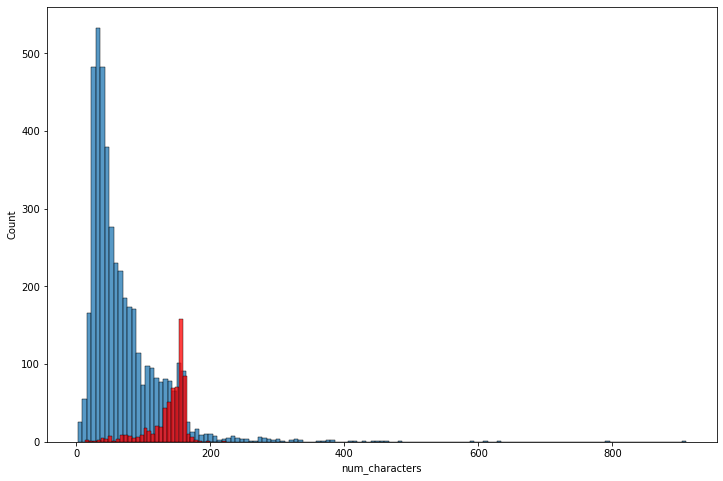

In [26]:
# seeing the above information in form of histogram
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

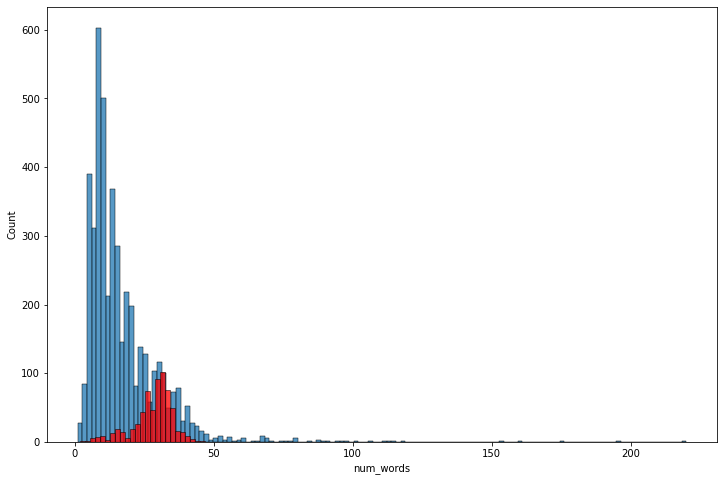

In [27]:
# seeing num of words distribution for hams and spams in form of histogram
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

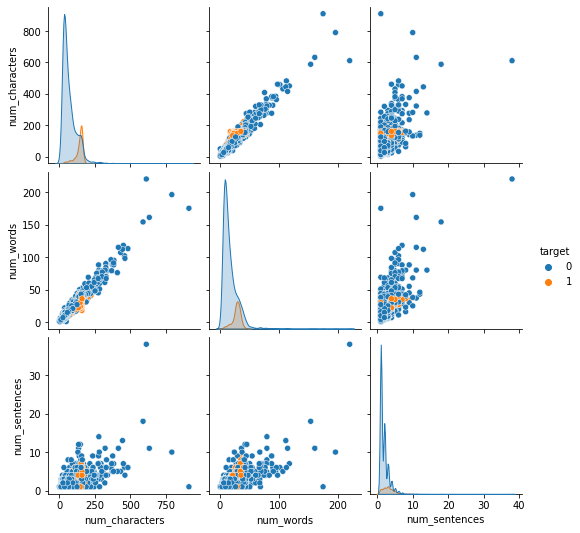

In [28]:
# to see the relationship between number of words and number of sentences
sns.pairplot(df, hue="target")

<AxesSubplot:>

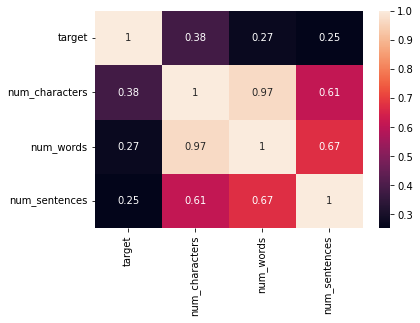

In [29]:
# the above analysis does not gave much insight just indicated that there are outliers in the data
# now finding pierson correlation by creating a heatmap
sns.heatmap(df.corr(), annot = True)

In [30]:
# so based on heatmap we can say, num_characters has maximum correlation with target, 
#mean the more character the more target value which means 1
# the num_characters column will be chosen

## Data Preprocessing
#### 1. Lower Case
#### 2. Tokenization
#### 3. Removing Special Characters
#### 4. Removing Stop Words and Puntuations
#### 5. Stemming

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string     # importing for puctuation
stopwords.words("english")
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PAK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    # removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
# removing stop words and punctuation
    text = y[:]    # since we are trying to copy a list so we have to do clonning
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    # removing stop words and punctuation
    text = y[:]    # since we are trying to copy a list so we have to do clonning
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)    # to return as a string

In [33]:
transform_text("Hi HAHF my name is kainat 01$$ dancing")

'hi hahf name kainat 01 danc'

In [34]:
df['transform_text'] = df['text'].apply(transform_text)

In [35]:
# to see most used words in ham and spam
from wordcloud import WordCloud
wc = WordCloud(width=500, height = 500, min_font_size = 10, background_color = "white")

In [36]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep = " "))

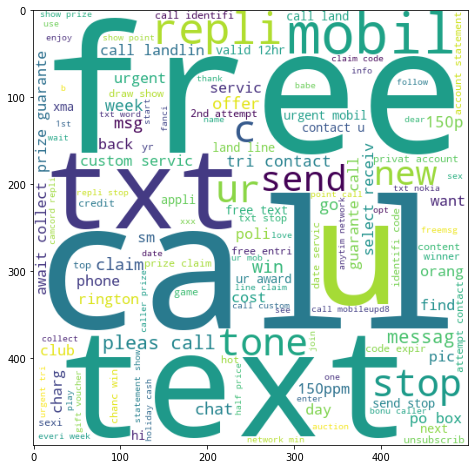

In [37]:
plt.figure(figsize = (15,8))
plt.imshow(spam_wc)

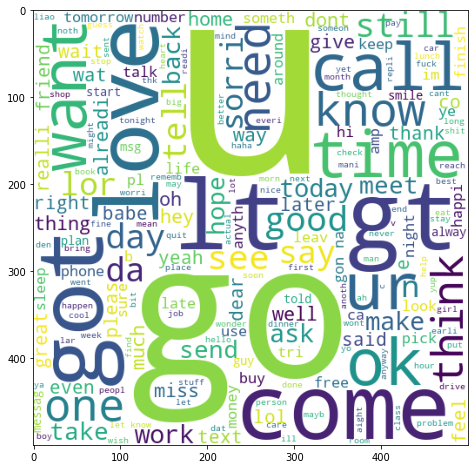

In [38]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep = " "))
plt.figure(figsize = (15,8))
plt.imshow(ham_wc)

In [39]:
# now we are trying to see top 30 words in ham and spam
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [40]:
len(spam_corpus)

10151

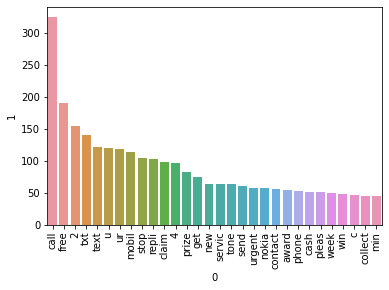

In [41]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [42]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

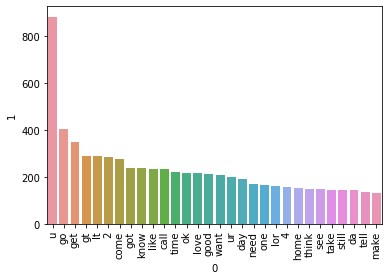

In [43]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transform_text']).toarray()

In [45]:
X.shape

(5169, 3000)

In [46]:
y = df['target'].values

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [49]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[786 110]
 [ 24 114]]
0.5089285714285714


In [52]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [53]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


In [54]:
 # so we are choosing tfidf --> mnb because data is imbalanced so precision is more important than accuracy 
# tfidf --> mnb is giving 100% precision

In [75]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [76]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver = 'liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state=2)
abc = AdaBoostClassifier(n_estimators = 50, random_state=2)
bc = BaggingClassifier(n_estimators = 50, random_state=2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state=2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

In [77]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [78]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [79]:
train_classifier(svc, X_train, y_train, X_test, y_test)


(0.97678916827853, 0.975)

In [80]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Acuuracy", current_accuracy)
    print("Precision", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Acuuracy 0.97678916827853
Precision 0.975
For  KN
Acuuracy 0.9052224371373307
Precision 1.0
For  NB
Acuuracy 0.9729206963249516
Precision 1.0
For  DT
Acuuracy 0.9352030947775629
Precision 0.8514851485148515
For  LR
Acuuracy 0.9564796905222437
Precision 0.9696969696969697
For  RF
Acuuracy 0.9758220502901354
Precision 1.0


C:\Users\PAK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Acuuracy 0.9690522243713733
Precision 0.9649122807017544
For  BgC
Acuuracy 0.9574468085106383
Precision 0.8560606060606061
For  ETC
Acuuracy 0.9777562862669246
Precision 0.9831932773109243
For  GBDT
Acuuracy 0.9487427466150871
Precision 0.9381443298969072
For  xgb
Acuuracy 0.9700193423597679
Precision 0.9495798319327731


In [81]:
 performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.972921,1.000000
5,RF,0.975822,1.000000
8,ETC,0.977756,0.983193
0,SVC,0.976789,0.975000
4,LR,0.956480,0.969697
6,AdaBoost,0.969052,0.964912
10,xgb,0.970019,0.949580
9,GBDT,0.948743,0.938144
7,BgC,0.957447,0.856061


In [82]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

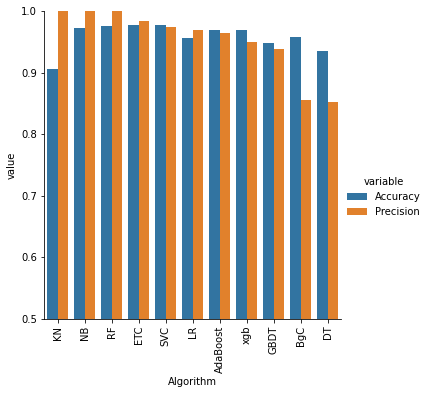

In [83]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
# model improvement
# 1. Change the max_features parameter of Tfidf to 3000 and run above code again as a result NB accuracy increased from 95% to 97%

In [85]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))